In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/study_data.csv', sep=';')

In [3]:
data.head()

,Date,Type,Piattaforma,Units,Difficulty,Time Start,Time End,Temp1,Temp2
0,02/01/2022,Pairing,local,4,NaN,14:00,16:00,NaN,NaN
1,03/01/2022,Studying,datacamp,6,NaN,NaN,NaN,NaN,NaN
2,04/01/2022,Studying,datacamp,6,NaN,NaN,NaN,NaN,NaN
3,05/01/2022,Studying,datacamp,6,NaN,NaN,NaN,NaN,NaN
4,06/01/2022,Studying,datacamp,6,NaN,NaN,NaN,NaN,NaN


In [4]:
col_del = ['Difficulty', 'Temp1', 'Temp2']
data.drop(columns = col_del, inplace=True)

In [5]:
data.head()

,Date,Type,Piattaforma,Units,Time Start,Time End
0,02/01/2022,Pairing,local,4,14:00,16:00
1,03/01/2022,Studying,datacamp,6,NaN,NaN
2,04/01/2022,Studying,datacamp,6,NaN,NaN
3,05/01/2022,Studying,datacamp,6,NaN,NaN
4,06/01/2022,Studying,datacamp,6,NaN,NaN


In [6]:
data['Date'] = pd.to_datetime(data.Date, format= '%d/%m/%Y')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         129 non-null    datetime64[ns]
 1   Type         128 non-null    object        
 2   Piattaforma  128 non-null    object        
 3   Units        129 non-null    int64         
 4   Time Start   23 non-null     object        
 5   Time End     23 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 6.2+ KB


In [8]:
def sanitized_col_names(col_names: list) -> list:
    new_col_names = []
    for column in col_names:
        column = column.replace(' ', '_')
        column = column.lower()
        new_col_names.append(column)
    return new_col_names

In [9]:
data.columns = sanitized_col_names(data.columns)

In [10]:
data.head()

,date,type,piattaforma,units,time_start,time_end
0,2022-01-02,Pairing,local,4,14:00,16:00
1,2022-01-03,Studying,datacamp,6,NaN,NaN
2,2022-01-04,Studying,datacamp,6,NaN,NaN
3,2022-01-05,Studying,datacamp,6,NaN,NaN
4,2022-01-06,Studying,datacamp,6,NaN,NaN


In [11]:
data.describe()

,units
count,129.000000
mean,6.868217
std,3.398942
min,0.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,18.000000


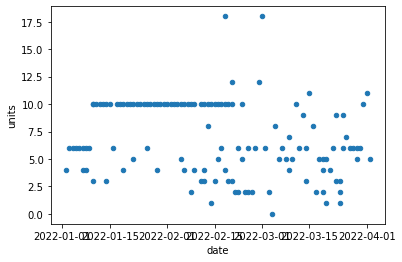

In [12]:
data.plot(kind='scatter', x='date', y='units')
plt.show()

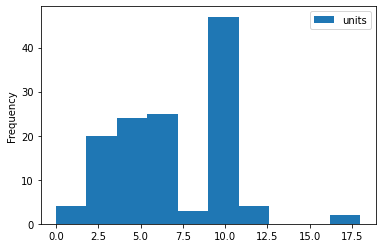

In [13]:
data.plot(kind='hist', x='date')
plt.show()

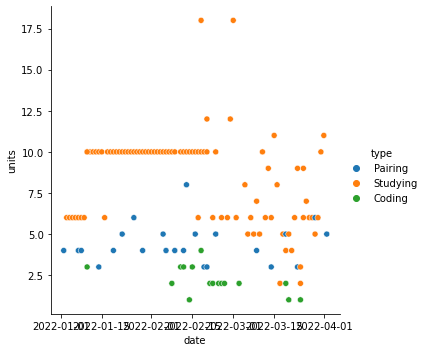

In [14]:
sns.relplot(x="date", y="units", data=data, hue='type')


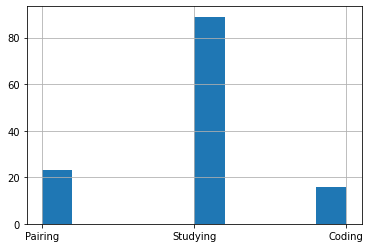

In [15]:
data["type"].hist()
plt.show()

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'units'}>]], dtype=object)

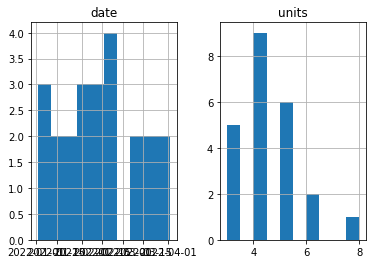

In [16]:
data[data["type"] == "Pairing"].hist()

<AxesSubplot:>

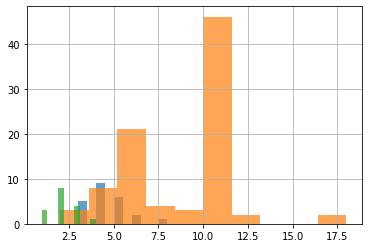

In [17]:
data[data["type"] == "Pairing"]['units'].hist(alpha=0.7)
data[data["type"] == "Studying"]['units'].hist(alpha=0.7)
data[data["type"] == "Coding"]['units'].hist(alpha=0.7)

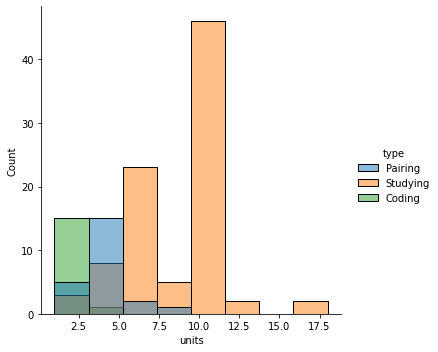

In [18]:
sns.displot(data, x="units", hue="type")

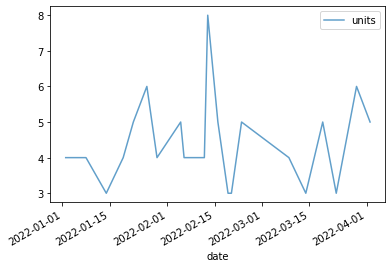

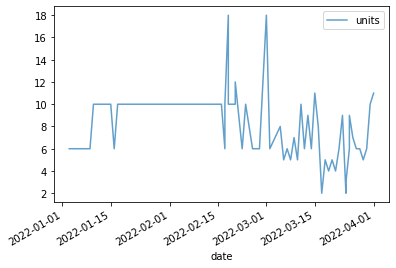

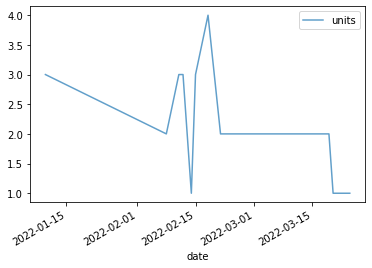

In [19]:
data[data["type"] == "Pairing"].plot(x='date', y='units', alpha=0.7)
data[data["type"] == "Studying"].plot(x='date', y='units', alpha=0.7)
data[data["type"] == "Coding"].plot(x='date', y='units', alpha=0.7)
plt.show()